# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi
### Web sitesinde geçirilen süre gerçekten 170sn mi? (Tek Örneklem T Testi)
## Detaylar
* Yazılımlardan elde edilen web süresinde geçirilen ort. süreler var 
* Hipotez testleriyle bu sürenin gerçekliğini ispat edilmek isteniyor

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats

olcumler = np.array([17,160,234,149,145,107,197,75,201,225, 211,119,
                     157, 145,127,244,163,114,145,65,112,185,202,146,203,
                     224,203, 114,188,156,187,154,177,96,165,50,110,
                     216, 138, 151,166,135,155,84,251,173,131,207,121,120])

In [6]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [20]:
stats.describe(olcumler)  #pands cevr. gerkt. icin stats.descrb kullanıldı

DescribeResult(nobs=50, minmax=(17, 251), mean=154.4, variance=2575.6326530612246, skewness=-0.32399653469680706, kurtosis=-0.055053811933191366)

# Varsayım Testleri
## Normallik Varsayımları
Varsayım testleri iki şekilde gerçekleştirilebilir 
* Grafik Yöntemlerle (histogram ve qqplot)
* Bazı testler ile (shapiro)


<Axes: ylabel='Frequency'>

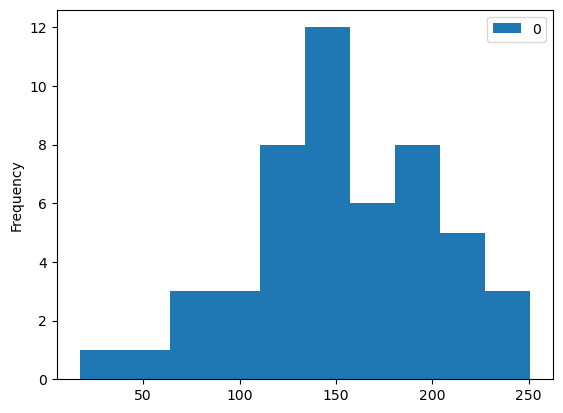

In [13]:
#Histogram Grafk.
pd.DataFrame(olcumler).plot.hist()

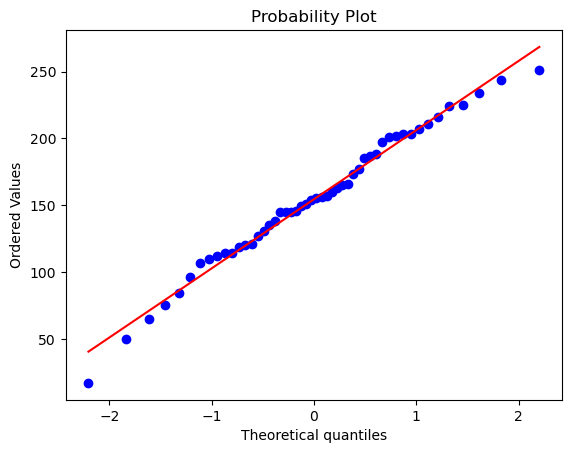

In [15]:
#qqplot Grafik.

import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

Ordered Values (Örnek Dağılımını) => Elimizdeki gözlemlerin dağılımı  
Theoretical quantiles (Teorik Dağılımı) => Normal dağılım  

=> Bu grafik çıkarımından örnek dağılımı ve teorik dağılım eşit olduğunu görmekteyiz.


## Shapiro-Wilk Testi
H0: Örnek dağılımı ve teorik dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.  
H1: ... fark vardır

In [18]:
from scipy.stats import shapiro

shapiro(olcumler)

ShapiroResult(statistic=0.9852638244628906, pvalue=0.7828896045684814)

pvalue değeri > 0.05'den olduğu için H0 reddedilemez.  

H0: Örnek dağılımı ve teorik dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.  
=> Tek Örneklem T Testini Uygulayabiliriz çünkü Normal Dağılım Varsayılımı sağlanmıştır

In [19]:
#Hipotez Testinin Uygulanması
stats.ttest_1samp(olcumler, popmean=170)

TtestResult(statistic=-2.1735400119120696, pvalue=0.03460101843133983, df=49)

H0: Web sitesinde geçirilen ortalama süre 170sn  
H1: ... değildir

=> Pvalue < 0.05 olduğu için H0 hipotezi reddedilir  
=> Ortalamadan da yola çıkarak yorum yapacak olursak  
=> Web sitesinde geçirilen süre 170sn den küçüktür, yorumu yapılabilir